In [ ]:
pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.9 MB/s eta 0:00:00


Giá cước: 75.0
Điểm thưởng: 85.00000000000001


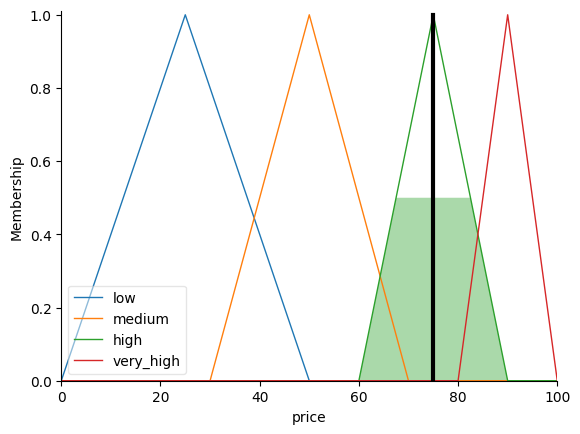

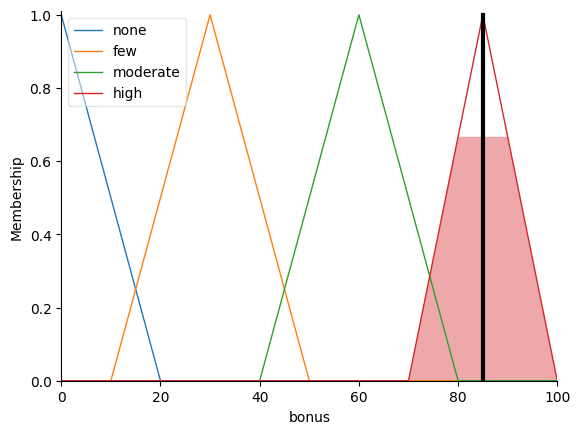

In [15]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


distance = ctrl.Antecedent(np.arange(0, 51, 1), 'distance')
traffic = ctrl.Antecedent(np.arange(0, 101, 1), 'traffic')
demand = ctrl.Antecedent(np.arange(0, 101, 1), 'demand')
weather = ctrl.Antecedent(np.arange(0, 11, 1), 'weather')
rating = ctrl.Antecedent(np.arange(1, 6, 0.1), 'rating')
punctuality = ctrl.Antecedent(np.arange(0, 101, 1), 'punctuality')


price = ctrl.Consequent(np.arange(0, 101, 1), 'price')
bonus = ctrl.Consequent(np.arange(0, 101, 1), 'bonus')
distance['short'] = fuzz.trimf(distance.universe, [0, 0, 3])
distance['medium'] = fuzz.trimf(distance.universe, [2, 5, 8])
distance['long'] = fuzz.trimf(distance.universe, [6, 13, 20])
distance['very_long'] = fuzz.trimf(distance.universe, [15, 32.5, 50])


traffic['low'] = fuzz.trimf(traffic.universe, [0, 0, 30])
traffic['medium'] = fuzz.trimf(traffic.universe, [20, 45, 70])
traffic['high'] = fuzz.trimf(traffic.universe, [60, 80, 100])


demand['low'] = fuzz.trimf(demand.universe, [0, 0, 30])
demand['medium'] = fuzz.trimf(demand.universe, [20, 45, 70])
demand['high'] = fuzz.trimf(demand.universe, [60, 80, 100])


weather['good'] = fuzz.trimf(weather.universe, [0, 0, 4])
weather['moderate'] = fuzz.trimf(weather.universe, [2, 5, 8])
weather['bad'] = fuzz.trimf(weather.universe, [6, 8, 10])


rating['poor'] = fuzz.trimf(rating.universe, [1, 1.75, 2.5])
rating['average'] = fuzz.trimf(rating.universe, [2, 3, 4])
rating['good'] = fuzz.trimf(rating.universe, [3.5, 4.25, 5])


punctuality['late'] = fuzz.trimf(punctuality.universe, [0, 25, 50])
punctuality['on_time'] = fuzz.trimf(punctuality.universe, [40, 60, 80])
punctuality['early'] = fuzz.trimf(punctuality.universe, [70, 85, 100])


price['low'] = fuzz.trimf(price.universe, [0, 25, 50])
price['medium'] = fuzz.trimf(price.universe, [30, 50, 70])
price['high'] = fuzz.trimf(price.universe, [60, 75, 90])
price['very_high'] = fuzz.trimf(price.universe, [80, 90, 100])


bonus['none'] = fuzz.trimf(bonus.universe, [0, 0, 20])
bonus['few'] = fuzz.trimf(bonus.universe, [10, 30, 50])
bonus['moderate'] = fuzz.trimf(bonus.universe, [40, 60, 80])
bonus['high'] = fuzz.trimf(bonus.universe, [70, 85, 100])


rules = [
    ctrl.Rule(distance['short'] & traffic['low'] & demand['low'], price['low']),
    ctrl.Rule(distance['short'] & traffic['medium'] & demand['high'], price['medium']),
    ctrl.Rule(distance['medium'] & traffic['high'] & demand['high'], price['high']),
    ctrl.Rule(distance['long'] & traffic['medium'] & weather['good'], price['medium']),
    ctrl.Rule(distance['long'] & traffic['high'] & weather['bad'], price['very_high']),
    ctrl.Rule(distance['very_long'] & traffic['high'] & demand['high'], price['very_high']),
    ctrl.Rule(distance['medium'] & traffic['low'] & demand['low'], price['medium']),
    ctrl.Rule(distance['short'] & traffic['high'] & weather['bad'], price['high']),
    ctrl.Rule(distance['very_long'] & weather['bad'], price['very_high']),
    ctrl.Rule(distance['medium'] & traffic['medium'] & weather['moderate'], price['medium']),

    ctrl.Rule(rating['good'] & punctuality['early'], bonus['high']),
    ctrl.Rule(rating['average'] & punctuality['on_time'], bonus['moderate']),
    ctrl.Rule(rating['poor'] & punctuality['late'], bonus['none']),
    ctrl.Rule(distance['long'] & traffic['high'] & punctuality['on_time'], bonus['high']),
    ctrl.Rule(distance['medium'] & traffic['medium'] & rating['good'], bonus['moderate']),
    ctrl.Rule(rating['poor'] & punctuality['late'], bonus['none']),
    ctrl.Rule(distance['very_long'] & weather['bad'] & rating['good'], bonus['high']),
    ctrl.Rule(distance['short'] & rating['average'] & punctuality['on_time'], bonus['few']),
    ctrl.Rule(distance['long'] & traffic['high'] & punctuality['late'], bonus['few']),
    ctrl.Rule(distance['medium'] & weather['moderate'] & rating['good'], bonus['moderate'])
]
price_bonus_ctrl = ctrl.ControlSystem(rules)
pricebonus_system = ctrl.ControlSystemSimulation(price_bonus_ctrl)
pricebonus_system.input['distance'] = 5
pricebonus_system.input['traffic'] = 70
pricebonus_system.input['demand'] = 80
pricebonus_system.input['weather'] = 2
pricebonus_system.input['rating'] = 4.5
pricebonus_system.input['punctuality'] = 85
pricebonus_system.compute()
print("Giá cước:", pricebonus_system.output['price'])
print("Điểm thưởng:", pricebonus_system.output['bonus'])
price.view(sim=pricebonus_system)
bonus.view(sim=pricebonus_system)


 giam gia:  60.0


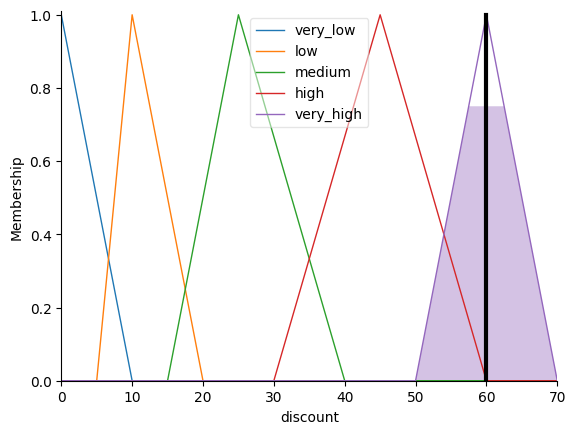

In [19]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

store_rating = ctrl.Antecedent(np.arange(0, 5.1, 0.1), 'store_rating')
sales_volume = ctrl.Antecedent(np.arange(0, 101, 1), 'sales_volume')
profit_margin = ctrl.Antecedent(np.arange(0, 101, 1), 'profit_margin')
seasonal_event = ctrl.Antecedent(np.arange(0, 11, 1), 'seasonal_event')
competitor_discounts = ctrl.Antecedent(np.arange(0, 101, 1), 'competitor_discounts')
discount = ctrl.Consequent(np.arange(0, 71, 1), 'discount')

store_rating['low'] = fuzz.trimf(store_rating.universe, [0, 0, 4.0])
store_rating['medium'] = fuzz.trimf(store_rating.universe, [3.5, 4.25, 5.0])
store_rating['high'] = fuzz.trimf(store_rating.universe, [4.5, 5.0, 5.0])

sales_volume['low'] = fuzz.trimf(sales_volume.universe, [0, 0, 40])
sales_volume['medium'] = fuzz.trimf(sales_volume.universe, [30, 50, 70])
sales_volume['high'] = fuzz.trimf(sales_volume.universe, [60, 80, 100])

profit_margin['low'] = fuzz.trimf(profit_margin.universe, [0, 0, 30])
profit_margin['medium'] = fuzz.trimf(profit_margin.universe, [20, 50, 80])
profit_margin['high'] = fuzz.trimf(profit_margin.universe, [70, 100, 100])

seasonal_event['none'] = fuzz.trimf(seasonal_event.universe, [0, 0, 4])
seasonal_event['moderate'] = fuzz.trimf(seasonal_event.universe, [2, 5, 8])
seasonal_event['high'] = fuzz.trimf(seasonal_event.universe, [6, 10, 10])

competitor_discounts['low'] = fuzz.trimf(competitor_discounts.universe, [0, 0, 30])
competitor_discounts['medium'] = fuzz.trimf(competitor_discounts.universe, [20, 50, 80])
competitor_discounts['high'] = fuzz.trimf(competitor_discounts.universe, [60, 100, 100])

discount['very_low'] = fuzz.trimf(discount.universe, [0, 0, 10])
discount['low'] = fuzz.trimf(discount.universe, [5, 10, 20])
discount['medium'] = fuzz.trimf(discount.universe, [15, 25, 40])
discount['high'] = fuzz.trimf(discount.universe, [30, 45, 60])
discount['very_high'] = fuzz.trimf(discount.universe, [50, 60, 70])

rules = [
    ctrl.Rule(store_rating['high'] & sales_volume['high'] & profit_margin['high'], discount['very_low']),
    ctrl.Rule(store_rating['low'] & sales_volume['low'] & profit_margin['high'], discount['high']),
    ctrl.Rule(seasonal_event['high'] & competitor_discounts['high'], discount['very_high']),
    ctrl.Rule(store_rating['medium'] & sales_volume['medium'] & profit_margin['medium'], discount['medium']),
    ctrl.Rule(competitor_discounts['low'] & profit_margin['low'] & sales_volume['high'], discount['very_low']),
    ctrl.Rule(store_rating['low'] & seasonal_event['none'], discount['medium']),
    ctrl.Rule(sales_volume['low'] & profit_margin['low'], discount['very_high'])
]

discount_ctrl = ctrl.ControlSystem(rules)
discount_system = ctrl.ControlSystemSimulation(discount_ctrl)
discount_system.input['store_rating']=4.3
discount_system.input['sales_volume']= 50
discount_system.input['profit_margin']= 10
discount_system.input['seasonal_event']= 9
discount_system.input['competitor_discounts']= 90
discount_system.compute()
print(' giam gia: ', discount_system.output['discount'])
discount.view(sim=discount_system)

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

product_demand = ctrl.Antecedent(np.arange(0, 101, 1), 'product_demand')
competitor_pressure = ctrl.Antecedent(np.arange(0, 101, 1), 'competitor_pressure')
store_reputation = ctrl.Antecedent(np.arange(0, 5.1, 0.1), 'store_reputation')
profit_margin = ctrl.Antecedent(np.arange(0, 101, 1), 'profit_margin')
seasonal_demand = ctrl.Antecedent(np.arange(0, 11, 1), 'seasonal_demand')

discount = ctrl.Consequent(np.arange(0, 71, 1), 'discount')

product_demand['low'] = fuzz.trimf(product_demand.universe, [0, 0, 40])
product_demand['medium'] = fuzz.trimf(product_demand.universe, [30, 50, 70])
product_demand['high'] = fuzz.trimf(product_demand.universe, [60, 80, 100])

competitor_pressure['low'] = fuzz.trimf(competitor_pressure.universe, [0, 0, 40])
competitor_pressure['medium'] = fuzz.trimf(competitor_pressure.universe, [30, 50, 70])
competitor_pressure['high'] = fuzz.trimf(competitor_pressure.universe, [60, 80, 100])

store_reputation['low'] = fuzz.trimf(store_reputation.universe, [0, 0, 4.0])
store_reputation['medium'] = fuzz.trimf(store_reputation.universe, [3.5, 4.25, 5.0])
store_reputation['high'] = fuzz.trimf(store_reputation.universe, [4.5, 5.0, 5.0])

profit_margin['low'] = fuzz.trimf(profit_margin.universe, [0, 0, 30])
profit_margin['medium'] = fuzz.trimf(profit_margin.universe, [20, 50, 85])
profit_margin['high'] = fuzz.trimf(profit_margin.universe, [75, 100, 100])

seasonal_demand['none'] = fuzz.trimf(seasonal_demand.universe, [0, 0, 4])
seasonal_demand['moderate'] = fuzz.trimf(seasonal_demand.universe, [2, 5, 8])
seasonal_demand['high'] = fuzz.trimf(seasonal_demand.universe, [6, 10, 10])

discount['very_low'] = fuzz.trimf(discount.universe, [0, 0, 10])
discount['low'] = fuzz.trimf(discount.universe, [5, 10, 20])
discount['medium'] = fuzz.trimf(discount.universe, [15, 25, 40])
discount['high'] = fuzz.trimf(discount.universe, [30, 45, 60])
discount['very_high'] = fuzz.trimf(discount.universe, [50, 60, 70])

rules = [
    ctrl.Rule(product_demand['high'] & competitor_pressure['low'] & profit_margin['low'], discount['very_low']),
    ctrl.Rule(product_demand['low'] & competitor_pressure['high'] & profit_margin['high'], discount['high']),
    ctrl.Rule(store_reputation['high'] & profit_margin['medium'] & seasonal_demand['high'], discount['medium']),
    ctrl.Rule(competitor_pressure['high'] & seasonal_demand['high'] & profit_margin['high'], discount['very_high']),
    ctrl.Rule(store_reputation['low'] & product_demand['medium'] & profit_margin['low'], discount['medium']),
    ctrl.Rule(product_demand['high'] & seasonal_demand['none'] & competitor_pressure['low'], discount['very_low']),
    ctrl.Rule(profit_margin['high'] & competitor_pressure['medium'] & seasonal_demand['moderate'], discount['medium'])
]

discount_ctrl = ctrl.ControlSystem(rules)
discount_system = ctrl.ControlSystemSimulation(discount_ctrl)
discount_system.input['product_demand'] = 80
discount_system.input['competitor_pressure'] = 50
discount_system.input['store_reputation'] = 4.2
discount_system.input['profit_margin'] = 85
discount_system.input['seasonal_demand'] = 8
discount_system.compute()
print('giam gia:', discount_system.output['discount'])
discount.view(sim=discount_system)


muc do uu tien: 49.99999999999999


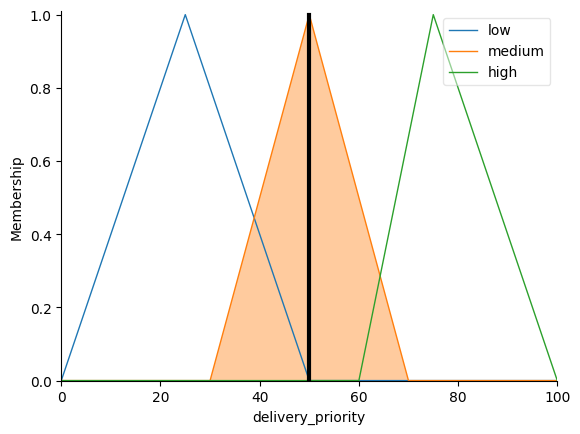

In [43]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

order_density = ctrl.Antecedent(np.arange(0, 101, 1), 'order_density')
delivery_urgency = ctrl.Antecedent(np.arange(0, 101, 1), 'delivery_urgency')
driver_load = ctrl.Antecedent(np.arange(0, 101, 1), 'driver_load')
traffic = ctrl.Antecedent(np.arange(0, 101, 1), 'traffic')
profit_per_delivery = ctrl.Antecedent(np.arange(0, 101, 1), 'profit_per_delivery')

orders_to_combine = ctrl.Consequent(np.arange(1, 11, 1), 'orders_to_combine')
delivery_priority = ctrl.Consequent(np.arange(0, 101, 1), 'delivery_priority')

order_density['low'] = fuzz.trimf(order_density.universe, [0, 0, 50])
order_density['medium'] = fuzz.trimf(order_density.universe, [30, 50, 70])
order_density['high'] = fuzz.trimf(order_density.universe, [50, 100, 100])

delivery_urgency['low'] = fuzz.trimf(delivery_urgency.universe, [0, 0, 50])
delivery_urgency['medium'] = fuzz.trimf(delivery_urgency.universe, [30, 50, 70])
delivery_urgency['high'] = fuzz.trimf(delivery_urgency.universe, [50, 100, 100])

driver_load['low'] = fuzz.trimf(driver_load.universe, [0, 0, 50])
driver_load['medium'] = fuzz.trimf(driver_load.universe, [30, 50, 70])
driver_load['high'] = fuzz.trimf(driver_load.universe, [50, 100, 100])

traffic['low'] = fuzz.trimf(traffic.universe, [0, 0, 50])
traffic['medium'] = fuzz.trimf(traffic.universe, [30, 50, 70])
traffic['high'] = fuzz.trimf(traffic.universe, [50, 100, 100])

profit_per_delivery['low'] = fuzz.trimf(profit_per_delivery.universe, [0, 0, 50])
profit_per_delivery['medium'] = fuzz.trimf(profit_per_delivery.universe, [30, 50, 70])
profit_per_delivery['high'] = fuzz.trimf(profit_per_delivery.universe, [50, 100, 100])

orders_to_combine['few'] = fuzz.trimf(orders_to_combine.universe, [1, 2, 4])
orders_to_combine['some'] = fuzz.trimf(orders_to_combine.universe, [3, 5, 7])
orders_to_combine['many'] = fuzz.trimf(orders_to_combine.universe, [6, 8, 10])

delivery_priority['low'] = fuzz.trimf(delivery_priority.universe, [0, 25, 50])
delivery_priority['medium'] = fuzz.trimf(delivery_priority.universe, [30, 50, 70])
delivery_priority['high'] = fuzz.trimf(delivery_priority.universe, [60, 75, 100])

rules = [
    ctrl.Rule(order_density['high'] & driver_load['low'] & traffic['low'], orders_to_combine['many']),
    ctrl.Rule(order_density['medium'] & traffic['high'] & delivery_urgency['medium'], orders_to_combine['few']),
    ctrl.Rule(driver_load['high'] & order_density['high'] & profit_per_delivery['medium'], orders_to_combine['some']),
    ctrl.Rule(order_density['low'] & delivery_urgency['high'] & traffic['medium'], orders_to_combine['few']),
    ctrl.Rule(profit_per_delivery['high'] & delivery_urgency['high'] & traffic['high'], orders_to_combine['few']),
    ctrl.Rule(delivery_urgency['high'] & profit_per_delivery['high'], delivery_priority['high']),
    ctrl.Rule(delivery_urgency['medium'] & traffic['medium'], delivery_priority['medium']),
    ctrl.Rule(delivery_urgency['low'] & order_density['high'] & profit_per_delivery['low'], delivery_priority['low'])
]

delivery_ctrl = ctrl.ControlSystem(rules)
delivery_system = ctrl.ControlSystemSimulation(delivery_ctrl)

delivery_system.input['order_density'] = 80
delivery_system.input['delivery_urgency'] = 50
delivery_system.input['driver_load'] = 20
delivery_system.input['traffic'] = 50
delivery_system.input['profit_per_delivery'] = 50
delivery_system.compute()
print('muc do uu tien:', delivery_system.output['delivery_priority'])
delivery_priority.view(sim=delivery_system)